In this technical project, we have selected a dataset from 'https://data.mendeley.com/datasets/8gx2fvg2k6/5' This is the fifth version of the data set that illustraties the order data, profit per order, delivery status, mode of shipment etc of a company that deals with Clothing , Sports , and Electronic Supplies. In this project we will resolve some hypothesis derived through the dataset and implement classifier models to predict the risk of late delivery.
In order to acquire the dataset, we first create table named 'DataCoSupplyChainDataset' in databricks where the data will be pulled through importing data types from pyspark.sql.types package. 

The name of the pyspark Data Frame is 'scm_df' that will be modified as per further processing.

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType
scm_df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  load("/FileStore/tables/DataCoSupplyChainDataset.csv"))

In [0]:
scm_df

Out[2]: DataFrame[Type: string, Days for shipping (real): int, Days for shipment (scheduled): int, Benefit per order: double, Sales per customer: double, Delivery Status: string, Late_delivery_risk: int, Category Id: int, Category Name: string, Customer City: string, Customer Country: string, Customer Email: string, Customer Fname: string, Customer Id: int, Customer Lname: string, Customer Password: string, Customer Segment: string, Customer State: string, Customer Street: string, Customer Zipcode: int, Department Id: int, Department Name: string, Latitude: double, Longitude: double, Market: string, Order City: string, Order Country: string, Order Customer Id: int, order date (DateOrders): string, Order Id: int, Order Item Cardprod Id: int, Order Item Discount: double, Order Item Discount Rate: double, Order Item Id: int, Order Item Product Price: double, Order Item Profit Ratio: double, Order Item Quantity: int, Sales: double, Order Item Total: double, Order Profit Per Order: double, Order Region: string, Order State: string, Order Status: string, Order Zipcode: int, Product Card Id: int, Product Category Id: int, Product Description: string, Product Image: string, Product Name: string, Product Price: double, Product Status: int, shipping date (DateOrders): string, Shipping Mode: string]

Unlike jupyter-notebook, in order to view data, we need to use display() function. The scm_df is visible with proper schema.

In [0]:
display(scm_df)

Type Days for shipping (real) Days for shipment (scheduled) Benefit per order Sales per customer Delivery Status Late_delivery_risk Category Id Category Name Customer City Customer Country Customer Email Customer Fname Customer Id Customer Lname Customer Password Customer Segment Customer State Customer Street Customer Zipcode Department Id Department Name Latitude Longitude Market Order City Order Country Order Customer Id order date (DateOrders) Order Id Order Item Cardprod Id Order Item Discount Order Item Discount Rate Order Item Id Order Item Product Price Order Item Profit Ratio Order Item Quantity Sales Order Item Total Order Profit Per Order Order Region Order State Order Status Order Zipcode Product Card Id Product Category Id Product Description Product Image Product Name Product Price Product Status shipping date (DateOrders) Shipping Mode DEBIT 3 4 91.25 314.6400146 Advance shipping 0 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Cally 20755 Holloway XXXXXXXXX Consumer PR 5365 Noble Nectar Island 725 2 Fitness 18.2514534 -66.03705597 Pacific Asia Bekasi Indonesia 20755 1/31/2018 22:56 77202 1360 13.10999966 0.039999999 180517 327.75 0.289999992 1 327.75 314.6400146 91.25 Southeast Asia Java Occidental COMPLETE null 1360 73 null http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 2/3/2018 22:56 Standard Class TRANSFER 5 4 -249.0899963 311.3599854 Late delivery 1 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Irene 19492 Luna XXXXXXXXX Consumer PR 2679 Rustic Loop 725 2 Fitness 18.27945137 -66.0370636 Pacific Asia Bikaner India 19492 1/13/2018 12:27 75939 1360 16.38999939 0.050000001 179254 327.75 -0.800000012 1 327.75 311.3599854 -249.0899963 South Asia Rajast�n PENDING null 1360 73 null http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/18/2018 12:27 Standard Class CASH 4 4 -247.7799988 309.7200012 Shipping on time 0 73 Sporting Goods San Jose EE. UU. XXXXXXXXX Gillian 19491 Maldonado XXXXXXXXX Consumer CA 8510 Round Bear Gate 95125 2 Fitness 37.29223251 -121.881279 Pacific Asia Bikaner India 19491 1/13/2018 12:06 75938 1360 18.03000069 0.059999999 179253 327.75 -0.800000012 1 327.75 309.7200012 -247.7799988 South Asia Rajast�n CLOSED null 1360 73 null http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/17/2018 12:06 Standard Class DEBIT 3 4 22.86000061 304.8099976 Advance shipping 0 73 Sporting Goods Los Angeles EE. UU. XXXXXXXXX Tana 19490 Tate XXXXXXXXX Home Office CA 3200 Amber Bend 90027 2 Fitness 34.12594605 -118.2910156 Pacific Asia Townsville Australia 19490 1/13/2018 11:45 75937 1360 22.94000053 0.07 179252 327.75 0.079999998 1 327.75 304.8099976 22.86000061 Oceania Queensland COMPLETE null 1360 73 null http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/16/2018 11:45 Standard Class PAYMENT 2 4 134.2100067 298.25 Advance shipping 0 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Orli 19489 Hendricks XXXXXXXXX Corporate PR 8671 Iron Anchor Corners 725 2 Fitness 18.25376892 -66.03704834 Pacific Asia Townsville Australia 19489 1/13/2018 11:24 75936 1360 29.5 0.090000004 179251 327.75 0.449999988 1 327.75 298.25 134.2100067 Oceania Queensland PENDING_PAYMENT null 1360 73 null http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/15/2018 11:24 Standard Class TRANSFER 6 4 18.57999992 294.980011 Shipping canceled 0 73 Sporting Goods Tonawanda EE. UU. XXXXXXXXX Kimberly 19488 Flowers XXXXXXXXX Consumer NY 2122 Hazy Corner 14150 2 Fitness 43.01396942 -78.87906647 Pacific Asia Toowoomba Australia 19488 1/13/2018 11:03 75935 1360 32.77999878 0.100000001 179250 327.75 0.059999999 1 327.75 294.980011 18.57999992 Oceania Queensland CANCELED null 1360 73 null http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/19/2018 11:03 Standard Class DEBIT 2 1 95.18000031 288.4200134 Late delivery 1 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Constance 19487 Terrell XXXXXXXXX Home Office PR 1879 Green Pine Bank 725 2 Fitness 18.24253845 -66.037

.printSchema() provides the readable view of Data Frame schema. This displays the type of data in each column identified by the pyspark.

In [0]:
scm_df.printSchema()

root
-- Type: string (nullable = true)
-- Days for shipping (real): integer (nullable = true)
-- Days for shipment (scheduled): integer (nullable = true)
-- Benefit per order: double (nullable = true)
-- Sales per customer: double (nullable = true)
-- Delivery Status: string (nullable = true)
-- Late_delivery_risk: integer (nullable = true)
-- Category Id: integer (nullable = true)
-- Category Name: string (nullable = true)
-- Customer City: string (nullable = true)
-- Customer Country: string (nullable = true)
-- Customer Email: string (nullable = true)
-- Customer Fname: string (nullable = true)
-- Customer Id: integer (nullable = true)
-- Customer Lname: string (nullable = true)
-- Customer Password: string (nullable = true)
-- Customer Segment: string (nullable = true)
-- Customer State: string (nullable = true)
-- Customer Street: string (nullable = true)
-- Customer Zipcode: integer (nullable = true)
-- Department Id: integer (nullable = true)
-- Department Name: string (nullable = true)
-- Latitude: double (nullable = true)
-- Longitude: double (nullable = true)
-- Market: string (nullable = true)
-- Order City: string (nullable = true)
-- Order Country: string (nullable = true)
-- Order Customer Id: integer (nullable = true)
-- order date (DateOrders): string (nullable = true)
-- Order Id: integer (nullable = true)
-- Order Item Cardprod Id: integer (nullable = true)
-- Order Item Discount: double (nullable = true)
-- Order Item Discount Rate: double (nullable = true)
-- Order Item Id: integer (nullable = true)
-- Order Item Product Price: double (nullable = true)
-- Order Item Profit Ratio: double (nullable = true)
-- Order Item Quantity: integer (nullable = true)
-- Sales: double (nullable = true)
-- Order Item Total: double (nullable = true)
-- Order Profit Per Order: double (nullable = true)
-- Order Region: string (nullable = true)
-- Order State: string (nullable = true)
-- Order Status: string (nullable = true)
-- Order Zipcode: integer (nullable = true)
-- Product Card Id: integer (nullable = true)
-- Product Category Id: integer (nullable = true)
-- Product Description: string (nullable = true)
-- Product Image: string (nullable = true)
-- Product Name: string (nullable = true)
-- Product Price: double (nullable = true)
-- Product Status: integer (nullable = true)
-- shipping date (DateOrders): string (nullable = true)
-- Shipping Mode: string (nullable = true)

Import a list of libraries for various applications. 
Numpy is a python library used for processing multi dimensional arrays and mathematical operations like linear algebra.
Pandas is used for data structures. It is majorly used for reading csv, txt or json files that can be used for data analysis.
Seaborn library is used for data visualization such as scatter plots, checking data normality etc.
Matplotlib is another library used for visualization. It embeds many other visualization library (such as seaborn). It is very handy while working in multidimensional arrays.
%matplotlib inline provides backend support to matplotlib. It will register a function that gets triggered whenever the output of a cell is a figure.

In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lets view the columns in the dataset. The raw dataset has 53 columns and 180519 rows as seen below.

In [0]:
print((scm_df.count(), len(scm_df.columns)))

(180519, 53)

In [0]:
scm_df.columns

Out[7]: ['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Image',
 'Product Name',
 'Product Price',
 'Product Status',
 'shipping date (DateOrders)',
 'Shipping Mode']

The first and foremost step is to identify null values. Like in jupyter-notebook, .isnull().sum() function will not work in pyspark libraries. Hence we import pyspark.sql.functions. Hence we define a function count_missing to check the count of null values in each column.

In [0]:
import pyspark.sql.functions as F
def count_missings(scm_df,sort=True):

    df = scm_df.select([F.count(F.when(F.isnan(c) | F.isnull(c), c)).alias(c) for (c,c_type) in scm_df.dtypes if c_type not in ('timestamp', 'string', 'date')]).toPandas()

    if len(df) == 0:
        print("There are no any missing values!")
        return None

    if sort:
        return df.rename(index={0: 'count'}).T.sort_values("count",ascending=False)

    return df

In [0]:
count_missings(scm_df)

count 
 
 
 
 
 Order Zipcode 
 155679 
 
 
 Customer Zipcode 
 3 
 
 
 Days for shipping (real) 
 0 
 
 
 Order Item Discount Rate 
 0 
 
 
 Product Price 
 0 
 
 
 Product Category Id 
 0 
 
 
 Product Card Id 
 0 
 
 
 Order Profit Per Order 
 0 
 
 
 Order Item Total 
 0 
 
 
 Sales 
 0 
 
 
 Order Item Quantity 
 0 
 
 
 Order Item Profit Ratio 
 0 
 
 
 Order Item Product Price 
 0 
 
 
 Order Item Id 
 0 
 
 
 Order Item Discount 
 0 
 
 
 Days for shipment (scheduled) 
 0 
 
 
 Order Item Cardprod Id 
 0 
 
 
 Order Id 
 0 
 
 
 Order Customer Id 
 0 
 
 
 Longitude 
 0 
 
 
 Latitude 
 0 
 
 
 Department Id 
 0 
 
 
 Customer Id 
 0 
 
 
 Category Id 
 0 
 
 
 Late_delivery_risk 
 0 
 
 
 Sales per customer 
 0 
 
 
 Benefit per order 
 0 
 
 
 Product Status 
 0

The above function is not displaying all columns. We will try another method using SQL query.

In [0]:
from pyspark.sql.functions import col,isnan, when, count
null_df = scm_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in scm_df.columns] )
display(null_df)

Type Days for shipping (real) Days for shipment (scheduled) Benefit per order Sales per customer Delivery Status Late_delivery_risk Category Id Category Name Customer City Customer Country Customer Email Customer Fname Customer Id Customer Lname Customer Password Customer Segment Customer State Customer Street Customer Zipcode Department Id Department Name Latitude Longitude Market Order City Order Country Order Customer Id order date (DateOrders) Order Id Order Item Cardprod Id Order Item Discount Order Item Discount Rate Order Item Id Order Item Product Price Order Item Profit Ratio Order Item Quantity Sales Order Item Total Order Profit Per Order Order Region Order State Order Status Order Zipcode Product Card Id Product Category Id Product Description Product Image Product Name Product Price Product Status shipping date (DateOrders) Shipping Mode 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 155679 0 0 180519 0 0 0 0 0 0

In [0]:
#scm_df.createOrReplaceTempView("DATA")
#spark.sql("SELECT 'Product Description' FROM DATA")

Null values are available in 3 columns. Order Zipcode, Product Description and Customer Zipcode. All 3 rows are irrelevant to the study. Hence we dropped the Order Zipcode. We are not dropping customer Zipcode as there are only 3 null values. Hence, substitute those 3 values as '0' . There will be no impact as this column will not be used further. Hence can drop it too.
Rename the new dataset after dropping the null values as scm_df2

In [0]:
scm_df1 = scm_df.na.fill(value=0,subset=["Customer Zipcode"])
scm_df2 = scm_df1.drop('Order Zipcode', 'Product Description')
display(scm_df2)

Type Days for shipping (real) Days for shipment (scheduled) Benefit per order Sales per customer Delivery Status Late_delivery_risk Category Id Category Name Customer City Customer Country Customer Email Customer Fname Customer Id Customer Lname Customer Password Customer Segment Customer State Customer Street Customer Zipcode Department Id Department Name Latitude Longitude Market Order City Order Country Order Customer Id order date (DateOrders) Order Id Order Item Cardprod Id Order Item Discount Order Item Discount Rate Order Item Id Order Item Product Price Order Item Profit Ratio Order Item Quantity Sales Order Item Total Order Profit Per Order Order Region Order State Order Status Product Card Id Product Category Id Product Image Product Name Product Price Product Status shipping date (DateOrders) Shipping Mode DEBIT 3 4 91.25 314.6400146 Advance shipping 0 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Cally 20755 Holloway XXXXXXXXX Consumer PR 5365 Noble Nectar Island 725 2 Fitness 18.2514534 -66.03705597 Pacific Asia Bekasi Indonesia 20755 1/31/2018 22:56 77202 1360 13.10999966 0.039999999 180517 327.75 0.289999992 1 327.75 314.6400146 91.25 Southeast Asia Java Occidental COMPLETE 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 2/3/2018 22:56 Standard Class TRANSFER 5 4 -249.0899963 311.3599854 Late delivery 1 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Irene 19492 Luna XXXXXXXXX Consumer PR 2679 Rustic Loop 725 2 Fitness 18.27945137 -66.0370636 Pacific Asia Bikaner India 19492 1/13/2018 12:27 75939 1360 16.38999939 0.050000001 179254 327.75 -0.800000012 1 327.75 311.3599854 -249.0899963 South Asia Rajast�n PENDING 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/18/2018 12:27 Standard Class CASH 4 4 -247.7799988 309.7200012 Shipping on time 0 73 Sporting Goods San Jose EE. UU. XXXXXXXXX Gillian 19491 Maldonado XXXXXXXXX Consumer CA 8510 Round Bear Gate 95125 2 Fitness 37.29223251 -121.881279 Pacific Asia Bikaner India 19491 1/13/2018 12:06 75938 1360 18.03000069 0.059999999 179253 327.75 -0.800000012 1 327.75 309.7200012 -247.7799988 South Asia Rajast�n CLOSED 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/17/2018 12:06 Standard Class DEBIT 3 4 22.86000061 304.8099976 Advance shipping 0 73 Sporting Goods Los Angeles EE. UU. XXXXXXXXX Tana 19490 Tate XXXXXXXXX Home Office CA 3200 Amber Bend 90027 2 Fitness 34.12594605 -118.2910156 Pacific Asia Townsville Australia 19490 1/13/2018 11:45 75937 1360 22.94000053 0.07 179252 327.75 0.079999998 1 327.75 304.8099976 22.86000061 Oceania Queensland COMPLETE 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/16/2018 11:45 Standard Class PAYMENT 2 4 134.2100067 298.25 Advance shipping 0 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Orli 19489 Hendricks XXXXXXXXX Corporate PR 8671 Iron Anchor Corners 725 2 Fitness 18.25376892 -66.03704834 Pacific Asia Townsville Australia 19489 1/13/2018 11:24 75936 1360 29.5 0.090000004 179251 327.75 0.449999988 1 327.75 298.25 134.2100067 Oceania Queensland PENDING_PAYMENT 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/15/2018 11:24 Standard Class TRANSFER 6 4 18.57999992 294.980011 Shipping canceled 0 73 Sporting Goods Tonawanda EE. UU. XXXXXXXXX Kimberly 19488 Flowers XXXXXXXXX Consumer NY 2122 Hazy Corner 14150 2 Fitness 43.01396942 -78.87906647 Pacific Asia Toowoomba Australia 19488 1/13/2018 11:03 75935 1360 32.77999878 0.100000001 179250 327.75 0.059999999 1 327.75 294.980011 18.57999992 Oceania Queensland CANCELED 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/19/2018 11:03 Standard Class DEBIT 2 1 95.18000031 288.4200134 Late delivery 1 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Constance 19487 Terrell XXXXXXXXX Home Office PR 1879 Green Pine Bank 725 2 Fitness 18.24253845 -66.03705597 Pacific Asia Guangzhou China 19487 1/13/2018 10:42 75934 1360 39.33000183 0.119999997 17

In [0]:
scm_df2.columns

Out[13]: ['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Card Id',
 'Product Category Id',
 'Product Image',
 'Product Name',
 'Product Price',
 'Product Status',
 'shipping date (DateOrders)',
 'Shipping Mode']

Now, lets start working on various hypothesis. The first focus for the project is to identify the market with most pending orders. It is a simple analysis to work upon pending orders as per regions. 
We use sqlcontext to view total distinct values in market. Then filter the order status for only pendding rows.

In [0]:
scm_df2.createOrReplaceTempView('data')
sqlContext.sql('select COUNT (Distinct Market) from data').show()

+----------------------+
count(DISTINCT Market)|
+----------------------+
 5|
+----------------------+

In [0]:
filter_data=scm_df2[(scm_df2['Order Status']=='PENDING')]
display(filter_data)

Type Days for shipping (real) Days for shipment (scheduled) Benefit per order Sales per customer Delivery Status Late_delivery_risk Category Id Category Name Customer City Customer Country Customer Email Customer Fname Customer Id Customer Lname Customer Password Customer Segment Customer State Customer Street Customer Zipcode Department Id Department Name Latitude Longitude Market Order City Order Country Order Customer Id order date (DateOrders) Order Id Order Item Cardprod Id Order Item Discount Order Item Discount Rate Order Item Id Order Item Product Price Order Item Profit Ratio Order Item Quantity Sales Order Item Total Order Profit Per Order Order Region Order State Order Status Product Card Id Product Category Id Product Image Product Name Product Price Product Status shipping date (DateOrders) Shipping Mode TRANSFER 5 4 -249.0899963 311.3599854 Late delivery 1 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Irene 19492 Luna XXXXXXXXX Consumer PR 2679 Rustic Loop 725 2 Fitness 18.27945137 -66.0370636 Pacific Asia Bikaner India 19492 1/13/2018 12:27 75939 1360 16.38999939 0.050000001 179254 327.75 -0.800000012 1 327.75 311.3599854 -249.0899963 South Asia Rajast�n PENDING 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/18/2018 12:27 Standard Class TRANSFER 5 2 45.68999863 268.7600098 Late delivery 1 73 Sporting Goods Freeport EE. UU. XXXXXXXXX Freya 19482 Robbins XXXXXXXXX Consumer NY 3243 Shady Corner 11520 2 Fitness 40.65486527 -73.58707428 Pacific Asia Manado Indonesia 19482 1/13/2018 8:57 75929 1360 59.0 0.180000007 179244 327.75 0.170000002 1 327.75 268.7600098 45.68999863 Southeast Asia C�lebes Septentrional PENDING 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/18/2018 8:57 Second Class TRANSFER 4 2 21.76000023 262.2000122 Late delivery 1 73 Sporting Goods Salinas EE. UU. XXXXXXXXX Cassandra 19481 Jensen XXXXXXXXX Corporate CA 131 Sunny Treasure Green 93905 2 Fitness 36.6763382 -121.656517 Pacific Asia Manado Indonesia 19481 1/13/2018 8:36 75928 1360 65.55000305 0.200000003 179243 327.75 0.079999998 1 327.75 262.2000122 21.76000023 Southeast Asia C�lebes Septentrional PENDING 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/17/2018 8:36 Second Class TRANSFER 5 4 82.30000305 304.8099976 Late delivery 1 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Alma 19472 Conley XXXXXXXXX Corporate PR 3732 Old Mountain Bank 725 2 Fitness 18.28337669 -66.03705597 Pacific Asia Jabalpur India 19472 1/13/2018 5:27 75919 1360 22.94000053 0.07 179234 327.75 0.270000011 1 327.75 304.8099976 82.30000305 South Asia Madhya Pradesh PENDING 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/18/2018 5:27 Standard Class TRANSFER 4 2 22.37000084 298.25 Late delivery 1 73 Sporting Goods Rancho Cordova EE. UU. XXXXXXXXX Yeo 19471 Bird XXXXXXXXX Corporate CA 6217 Rustic Lake Forest 95670 2 Fitness 38.61177445 -121.2828674 Pacific Asia Geelong Australia 19471 1/13/2018 5:06 75918 1360 29.5 0.090000004 179233 327.75 0.079999998 1 327.75 298.25 22.37000084 Oceania Victoria PENDING 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/17/2018 5:06 Second Class TRANSFER 5 2 90.54000092 278.5899963 Late delivery 1 73 Sporting Goods Wilkes Barre EE. UU. XXXXXXXXX Quail 19467 Ashley XXXXXXXXX Consumer PA 9814 Emerald Prairie Limits 18702 2 Fitness 41.23545456 -75.86985779 Pacific Asia Mandurah Australia 19467 1/13/2018 3:42 75914 1360 49.15999985 0.150000006 179229 327.75 0.330000013 1 327.75 278.5899963 90.54000092 Oceania Australia Occidental PENDING 1360 73 http://images.acmesports.sports/Smart+watch Smart watch 327.75 0 1/18/2018 3:42 Second Class TRANSFER 6 4 86.16999817 275.3099976 Late delivery 1 73 Sporting Goods Caguas Puerto Rico XXXXXXXXX Stacy 19448 Mckinney XXXXXXXXX Corporate PR 9712 Fallen Robin Diversion 725 2 Fitness 18.26469612 -66.03705597 Pacific Asia Bangalore India 19448 1/12/2018 21:02 75895 1360 52.4399986

In [0]:
# creating dataset with only 2 of the required rows
filter_data1= filter_data[['Market','Order Status']]
filter_data1.show()

+------------+------------+
 Market|Order Status|
+------------+------------+
Pacific Asia| PENDING|
Pacific Asia| PENDING|
Pacific Asia| PENDING|
Pacific Asia| PENDING|
Pacific Asia| PENDING|
Pacific Asia| PENDING|
Pacific Asia| PENDING|
Pacific Asia| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
 LATAM| PENDING|
+------------+------------+
only showing top 20 rows

In [0]:
# converting dataset to pandas Data Frame inorder to support the visualization libraries
pd_datadf = filter_data1.toPandas()

In [0]:
pd_datadf

Market 
 Order Status 
 
 
 
 
 0 
 Pacific Asia 
 PENDING 
 
 
 1 
 Pacific Asia 
 PENDING 
 
 
 2 
 Pacific Asia 
 PENDING 
 
 
 3 
 Pacific Asia 
 PENDING 
 
 
 4 
 Pacific Asia 
 PENDING 
 
 
 5 
 Pacific Asia 
 PENDING 
 
 
 6 
 Pacific Asia 
 PENDING 
 
 
 7 
 Pacific Asia 
 PENDING 
 
 
 8 
 LATAM 
 PENDING 
 
 
 9 
 LATAM 
 PENDING 
 
 
 10 
 LATAM 
 PENDING 
 
 
 11 
 LATAM 
 PENDING 
 
 
 12 
 LATAM 
 PENDING 
 
 
 13 
 LATAM 
 PENDING 
 
 
 14 
 LATAM 
 PENDING 
 
 
 15 
 LATAM 
 PENDING 
 
 
 16 
 LATAM 
 PENDING 
 
 
 17 
 LATAM 
 PENDING 
 
 
 18 
 LATAM 
 PENDING 
 
 
 19 
 LATAM 
 PENDING 
 
 
 20 
 LATAM 
 PENDING 
 
 
 21 
 LATAM 
 PENDING 
 
 
 22 
 LATAM 
 PENDING 
 
 
 23 
 LATAM 
 PENDING 
 
 
 24 
 LATAM 
 PENDING 
 
 
 25 
 LATAM 
 PENDING 
 
 
 26 
 LATAM 
 PENDING 
 
 
 27 
 LATAM 
 PENDING 
 
 
 28 
 LATAM 
 PENDING 
 
 
 29 
 LATAM 
 PENDING 
 
 
 ... 
 ... 
 ... 
 
 
 20197 
 Pacific Asia 
 PENDING 
 
 
 20198 
 Pacific Asia 
 PENDING 
 
 
 20199 
 Pacific Asia 
 PENDING 
 
 
 20200 
 Pacific Asia 
 PENDING 
 
 
 20201 
 Pacific Asia 
 PENDING 
 
 
 20202 
 Pacific Asia 
 PENDING 
 
 
 20203 
 Pacific Asia 
 PENDING 
 
 
 20204 
 Pacific Asia 
 PENDING 
 
 
 20205 
 Pacific Asia 
 PENDING 
 
 
 20206 
 Pacific Asia 
 PENDING 
 
 
 20207 
 Pacific Asia 
 PENDING 
 
 
 20208 
 Pacific Asia 
 PENDING 
 
 
 20209 
 Pacific Asia 
 PENDING 
 
 
 20210 
 Pacific Asia 
 PENDING 
 
 
 20211 
 Pacific Asia 
 PENDING 
 
 
 20212 
 Pacific Asia 
 PENDING 
 
 
 20213 
 Pacific Asia 
 PENDING 
 
 
 20214 
 Pacific Asia 
 PENDING 
 
 
 20215 
 Pacific Asia 
 PENDING 
 
 
 20216 
 Pacific Asia 
 PENDING 
 
 
 20217 
 Pacific Asia 
 PENDING 
 
 
 20218 
 Pacific Asia 
 PENDING 
 
 
 20219 
 Pacific Asia 
 PENDING 
 
 
 20220 
 Pacific Asia 
 PENDING 
 
 
 20221 
 Pacific Asia 
 PENDING 
 
 
 20222 
 Pacific Asia 
 PENDING 
 
 
 20223 
 Pacific Asia 
 PENDING 
 
 
 20224 
 Pacific Asia 
 PENDING 
 
 
 20225 
 Pacific Asia 
 PENDING 
 
 
 20226 
 Pacific Asia 
 PENDING 
 
 
 
 20227 rows × 2 columns

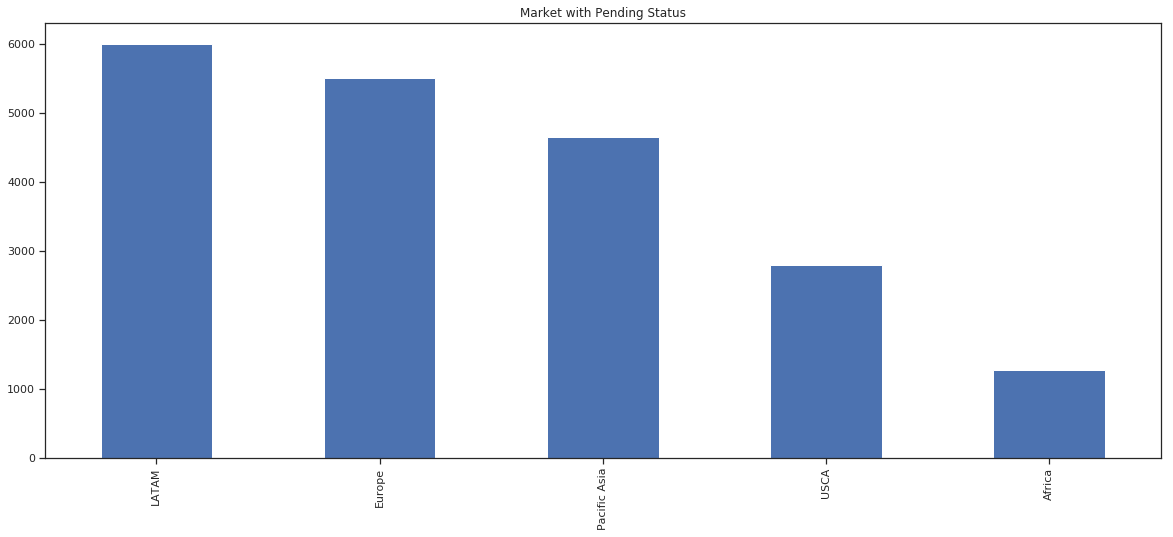

In [0]:
pd_datadf=pd_datadf['Market'].value_counts().plot.bar(figsize=(20,8), title="Market with Pending Status")

The bar plots indicates that Latam market has most pending orders. Lets study which countries within Latam has most pending orders.

In [0]:
filter_data=scm_df2[(scm_df2['Market']=='LATAM') & (scm_df2['Order Status']=='PENDING')]
filter_data1 = filter_data[['Market','Order Country','Order Status']]
display(filter_data1)

Market Order Country Order Status LATAM Uruguay PENDING LATAM Argentina PENDING LATAM Brasil PENDING LATAM Brasil PENDING LATAM Brasil PENDING LATAM Cuba PENDING LATAM Cuba PENDING LATAM Rep�blica Dominicana PENDING LATAM M�xico PENDING LATAM Panam� PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM Panam� PENDING LATAM Brasil PENDING LATAM Cuba PENDING LATAM Honduras PENDING LATAM Per� PENDING LATAM Cuba PENDING LATAM M�xico PENDING LATAM Nicaragua PENDING LATAM M�xico PENDING LATAM Argentina PENDING LATAM Brasil PENDING LATAM El Salvador PENDING LATAM M�xico PENDING LATAM Guatemala PENDING LATAM Cuba PENDING LATAM Panam� PENDING LATAM Colombia PENDING LATAM Brasil PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM Cuba PENDING LATAM Nicaragua PENDING LATAM Cuba PENDING LATAM Brasil PENDING LATAM Cuba PENDING LATAM Rep�blica Dominicana PENDING LATAM Brasil PENDING LATAM M�xico PENDING LATAM M�xico PENDING LATAM M�xico PENDING LATAM Guatemala PENDING LATAM Nicaragua PENDING LATAM El Salvador PENDING LATAM M�xico PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM M�xico PENDING LATAM Cuba PENDING LATAM M�xico PENDING LATAM Colombia PENDING LATAM Cuba PENDING LATAM Nicaragua PENDING LATAM Honduras PENDING LATAM Guatemala PENDING LATAM M�xico PENDING LATAM Guatemala PENDING LATAM Cuba PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM M�xico PENDING LATAM Nicaragua PENDING LATAM El Salvador PENDING LATAM M�xico PENDING LATAM Guatemala PENDING LATAM Brasil PENDING LATAM Brasil PENDING LATAM Colombia PENDING LATAM M�xico PENDING LATAM Cuba PENDING LATAM Brasil PENDING LATAM M�xico PENDING LATAM M�xico PENDING LATAM M�xico PENDING LATAM Rep�blica Dominicana PENDING LATAM Nicaragua PENDING LATAM Honduras PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM Honduras PENDING LATAM El Salvador PENDING LATAM M�xico PENDING LATAM El Salvador PENDING LATAM Rep�blica Dominicana PENDING LATAM Hait� PENDING LATAM Ecuador PENDING LATAM M�xico PENDING LATAM M�xico PENDING LATAM Venezuela PENDING LATAM M�xico PENDING LATAM M�xico PENDING LATAM Colombia PENDING LATAM Guatemala PENDING LATAM Per� PENDING LATAM Brasil PENDING LATAM Brasil PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM Jamaica PENDING LATAM Bolivia PENDING LATAM M�xico PENDING LATAM El Salvador PENDING LATAM M�xico PENDING LATAM Colombia PENDING LATAM Argentina PENDING LATAM Panam� PENDING LATAM Cuba PENDING LATAM Nicaragua PENDING LATAM Panam� PENDING LATAM Colombia PENDING LATAM Rep�blica Dominicana PENDING LATAM Chile PENDING LATAM Brasil PENDING LATAM Brasil PENDING LATAM Rep�blica Dominicana PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM Venezuela PENDING LATAM El Salvador PENDING LATAM Nicaragua PENDING LATAM Honduras PENDING LATAM Cuba PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM Panam� PENDING LATAM Chile PENDING LATAM Brasil PENDING LATAM Colombia PENDING LATAM Colombia PENDING LATAM Brasil PENDING LATAM El Salvador PENDING LATAM Cuba PENDING LATAM Brasil PENDING LATAM Rep�blica Dominicana PENDING LATAM Brasil PENDING LATAM Honduras PENDING LATAM Honduras PENDING LATAM Argentina PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM Honduras PENDING LATAM Guatemala PENDING LATAM M�xico PENDING LATAM Rep�blica Dominicana PENDING LATAM Cuba PENDING LATAM Brasil PENDING LATAM Honduras PENDING LATAM Chile PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM Brasil PENDING LATAM Nicaragua PENDING LATAM M�xico PENDING LATAM Brasil PENDING LATAM Honduras PENDING LATAM Brasil PENDING LATAM Brasil PENDING LATAM M�xico PENDING LATAM Argentina PENDING LATAM Brasil PENDING LATAM M�xico PENDING LATAM M�xico PENDING LATAM Rep�blica Dominicana PENDING LATAM Cuba PENDING LATAM M�xico PENDING LATAM Venezuela PENDING LATAM Rep�blica Dominicana PENDING LATAM Cuba PENDING LATAM Colombia PENDING LATAM Brasil PENDING LATAM Rep�blica Dominicana PENDING LATAM Rep�blica Dominicana PENDING LATAM Rep�blica Dominicana PENDING LATAM M�xico PENDING

In [0]:
pd_datadf = filter_data1.toPandas()
pd_datadf

Market 
 Order Country 
 Order Status 
 
 
 
 
 0 
 LATAM 
 Uruguay 
 PENDING 
 
 
 1 
 LATAM 
 Argentina 
 PENDING 
 
 
 2 
 LATAM 
 Brasil 
 PENDING 
 
 
 3 
 LATAM 
 Brasil 
 PENDING 
 
 
 4 
 LATAM 
 Brasil 
 PENDING 
 
 
 5 
 LATAM 
 Cuba 
 PENDING 
 
 
 6 
 LATAM 
 Cuba 
 PENDING 
 
 
 7 
 LATAM 
 Rep�blica Dominicana 
 PENDING 
 
 
 8 
 LATAM 
 M�xico 
 PENDING 
 
 
 9 
 LATAM 
 Panam� 
 PENDING 
 
 
 10 
 LATAM 
 M�xico 
 PENDING 
 
 
 11 
 LATAM 
 Brasil 
 PENDING 
 
 
 12 
 LATAM 
 Panam� 
 PENDING 
 
 
 13 
 LATAM 
 Brasil 
 PENDING 
 
 
 14 
 LATAM 
 Cuba 
 PENDING 
 
 
 15 
 LATAM 
 Honduras 
 PENDING 
 
 
 16 
 LATAM 
 Per� 
 PENDING 
 
 
 17 
 LATAM 
 Cuba 
 PENDING 
 
 
 18 
 LATAM 
 M�xico 
 PENDING 
 
 
 19 
 LATAM 
 Nicaragua 
 PENDING 
 
 
 20 
 LATAM 
 M�xico 
 PENDING 
 
 
 21 
 LATAM 
 Argentina 
 PENDING 
 
 
 22 
 LATAM 
 Brasil 
 PENDING 
 
 
 23 
 LATAM 
 El Salvador 
 PENDING 
 
 
 24 
 LATAM 
 M�xico 
 PENDING 
 
 
 25 
 LATAM 
 Guatemala 
 PENDING 
 
 
 26 
 LATAM 
 Cuba 
 PENDING 
 
 
 27 
 LATAM 
 Panam� 
 PENDING 
 
 
 28 
 LATAM 
 Colombia 
 PENDING 
 
 
 29 
 LATAM 
 Brasil 
 PENDING 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 5970 
 LATAM 
 Cuba 
 PENDING 
 
 
 5971 
 LATAM 
 M�xico 
 PENDING 
 
 
 5972 
 LATAM 
 M�xico 
 PENDING 
 
 
 5973 
 LATAM 
 Honduras 
 PENDING 
 
 
 5974 
 LATAM 
 Guatemala 
 PENDING 
 
 
 5975 
 LATAM 
 Honduras 
 PENDING 
 
 
 5976 
 LATAM 
 Honduras 
 PENDING 
 
 
 5977 
 LATAM 
 M�xico 
 PENDING 
 
 
 5978 
 LATAM 
 M�xico 
 PENDING 
 
 
 5979 
 LATAM 
 M�xico 
 PENDING 
 
 
 5980 
 LATAM 
 Panam� 
 PENDING 
 
 
 5981 
 LATAM 
 Colombia 
 PENDING 
 
 
 5982 
 LATAM 
 Brasil 
 PENDING 
 
 
 5983 
 LATAM 
 Jamaica 
 PENDING 
 
 
 5984 
 LATAM 
 Cuba 
 PENDING 
 
 
 5985 
 LATAM 
 Panam� 
 PENDING 
 
 
 5986 
 LATAM 
 Colombia 
 PENDING 
 
 
 5987 
 LATAM 
 Brasil 
 PENDING 
 
 
 5988 
 LATAM 
 Honduras 
 PENDING 
 
 
 5989 
 LATAM 
 Nicaragua 
 PENDING 
 
 
 5990 
 LATAM 
 M�xico 
 PENDING 
 
 
 5991 
 LATAM 
 Nicaragua 
 PENDING 
 
 
 5992 
 LATAM 
 Brasil 
 PENDING 
 
 
 5993 
 LATAM 
 Brasil 
 PENDING 
 
 
 5994 
 LATAM 
 El Salvador 
 PENDING 
 
 
 5995 
 LATAM 
 Honduras 
 PENDING 
 
 
 5996 
 LATAM 
 Honduras 
 PENDING 
 
 
 5997 
 LATAM 
 M�xico 
 PENDING 
 
 
 5998 
 LATAM 
 Rep�blica Dominicana 
 PENDING 
 
 
 5999 
 LATAM 
 El Salvador 
 PENDING 
 
 
 
 6000 rows × 3 columns

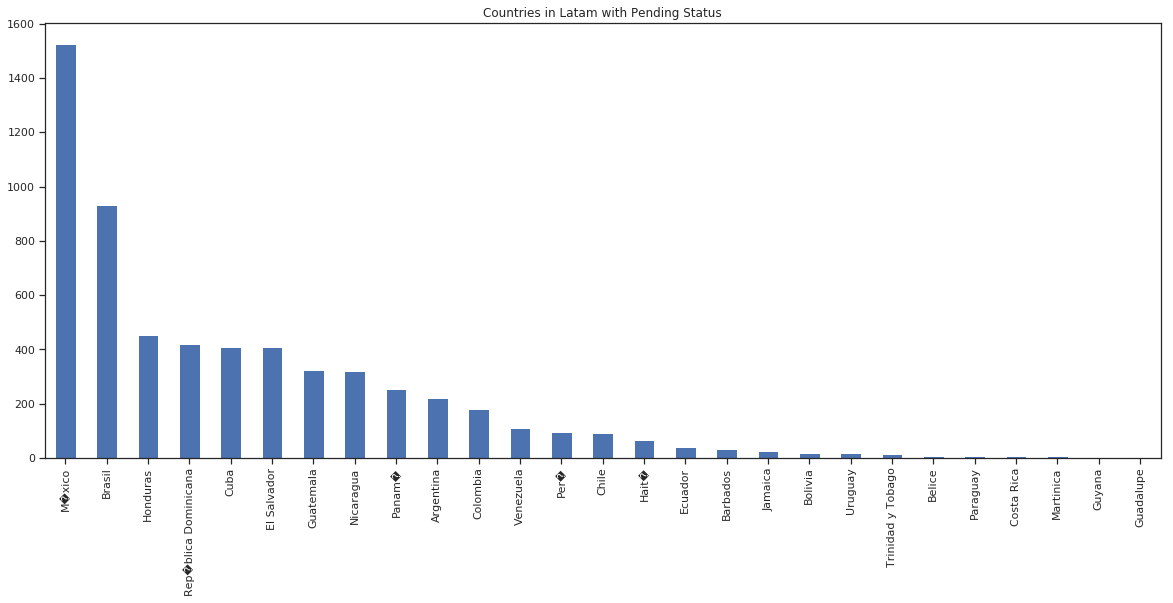

In [0]:
pd_datadf=pd_datadf['Order Country'].value_counts().plot.bar(figsize=(20,8), title="Countries in Latam with Pending Status")

Hypothesis 1: It is understood that Mexico and Brazil possess maximum pending orders. These countries need to work on scheduling to reduce the overall count and customer satisfaction.

Please install plotly libraries from pypl in Databricks to use plotly for visualization. It will get installed with clusters.

In [0]:
from plotly.offline import plot
from plotly.graph_objs import *
import plotly.express as px

With the help of plotly.express, plot a bar graph indicating delivery status for each region. It is learnt that Central America and WesternEurope has maximum late deliveries (over 15000 orders). Substantial improvement is required.

In [0]:
pd_datadf = scm_df2.toPandas()
data_delivery_status = pd_datadf.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status, x='Delivery Status', y='Number of Orders'  , color='Order Region', title="Delivery Status"
      )

Hypothesis 2- Which region has highest order profit?

Western Europe with $625446 and Central America with $616341

In [0]:
data_Region=pd_datadf.groupby(['Order Region'])['Order Profit Per Order'].sum().reset_index(name='Order Profit').sort_values(by= 'Order Profit', ascending= True)
px.bar(data_Region, x='Order Profit',y = 'Order Region',color ='Order Profit', title="Region wise order profit")

Hypothesis 3: Which category product has highest profit margin?

Fishing category products - $756220

Cleats category products - $494636

Need to work upon increasing order profit for Soccer, Strength training and Video games going with the popularity

In [0]:
data_category=pd_datadf.groupby(['Category Name'])['Order Profit Per Order'].sum().reset_index(name='Order Profit').sort_values(by= 'Order Profit', ascending= True)
px.bar(data_category, x='Order Profit',y = 'Category Name',color ='Order Profit',title="Product Category wise order profit")

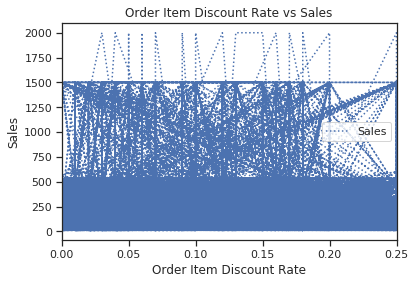

In [0]:
#Scatter plot
pd_datadf.plot(x='Order Item Discount Rate', y='Sales',linestyle='dotted',
     markerfacecolor='red', markersize=12) 
plt.title('Order Item Discount Rate vs Sales')#title
plt.xlabel('Order Item Discount Rate')  # X-axis title
plt.ylabel('Sales') # Y=axis title
plt.show()

In [0]:
map_df= pd_datadf.groupby([ 'Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Order Profit').sort_values(by= 'Order Profit', ascending= False)
map_df



Order Country 
 Order City 
 Order Profit 
 
 
 
 
 3260 
 Rep�blica Dominicana 
 Santo Domingo 
 51111.670019 
 
 
 1492 
 Estados Unidos 
 New York City 
 47889.759868 
 
 
 2152 
 Honduras 
 Tegucigalpa 
 40973.640056 
 
 
 1430 
 Estados Unidos 
 Los Angeles 
 38014.360024 
 
 
 2837 
 Nicaragua 
 Managua 
 34319.950107 
 
 
 2771 
 M�xico 
 Mexico City 
 33523.450009 
 
 
 3155 
 Reino Unido 
 London 
 32281.599991 
 
 
 1703 
 Filipinas 
 Manila 
 31194.520013 
 
 
 1536 
 Estados Unidos 
 Philadelphia 
 26661.430046 
 
 
 2344 
 Indonesia 
 Yakarta 
 26414.899994 
 
 
 304 
 Austria 
 Viena 
 25937.880032 
 
 
 1139 
 Espa�a 
 Madrid 
 25519.480005 
 
 
 1598 
 Estados Unidos 
 San Francisco 
 23243.620261 
 
 
 203 
 Argentina 
 Buenos Aires 
 23237.500040 
 
 
 3417 
 Tailandia 
 Bangkok 
 22552.069923 
 
 
 2861 
 Nigeria 
 Lagos 
 22284.999902 
 
 
 573 
 Brasil 
 S�o Paulo 
 21554.380040 
 
 
 287 
 Australia 
 Sydney 
 21132.100044 
 
 
 1993 
 Francia 
 Paris 
 20782.739977 
 
 
 1612 
 Estados Unidos 
 Seattle 
 20755.650093 
 
 
 1256 
 Estados Unidos 
 Chicago 
 19695.110025 
 
 
 2151 
 Honduras 
 San Pedro Sula 
 18000.439985 
 
 
 20 
 Alemania 
 Berl�n 
 17899.760061 
 
 
 1088 
 El Salvador 
 San Salvador 
 17842.569956 
 
 
 3485 
 Turqu�a 
 Estambul 
 16557.459957 
 
 
 2527 
 Italia 
 Rome 
 16426.780057 
 
 
 2935 
 Panam� 
 Panama City 
 16397.909853 
 
 
 70 
 Alemania 
 Hamburgo 
 16336.350057 
 
 
 2137 
 Guatemala 
 Villa Nueva 
 14916.369986 
 
 
 1091 
 El Salvador 
 Soyapango 
 14625.150079 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 559 
 Brasil 
 Sinop 
 -970.739987 
 
 
 1168 
 Espa�a 
 Seville 
 -997.890081 
 
 
 2826 
 M�xico 
 Villa Frontera 
 -1001.739988 
 
 
 2854 
 Nigeria 
 Ikot Ekpene 
 -1038.919999 
 
 
 715 
 China 
 Anyang 
 -1048.859992 
 
 
 3267 
 Rumania 
 Baia Mare 
 -1061.590039 
 
 
 2623 
 Kenia 
 Kisumu 
 -1079.719985 
 
 
 52 
 Alemania 
 Flensburg 
 -1103.310023 
 
 
 1543 
 Estados Unidos 
 Pleasant Grove 
 -1138.710003 
 
 
 2095 
 Francia 
 Vichy 
 -1156.380012 
 
 
 135 
 Alemania 
 Schwerin 
 -1189.919987 
 
 
 3323 
 Rusia 
 Rybinsk 
 -1277.360007 
 
 
 3144 
 Reino Unido 
 Kettering 
 -1299.179995 
 
 
 2671 
 Marruecos 
 Beni Mellal 
 -1307.099960 
 
 
 2303 
 India 
 Warangal 
 -1309.019963 
 
 
 2905 
 Nueva Zelanda 
 Tauranga 
 -1366.860065 
 
 
 1219 
 Estados Unidos 
 Bloomington 
 -1369.559998 
 
 
 3419 
 Taiw�n 
 Taipei 
 -1374.540018 
 
 
 166 
 Angola 
 Luanda 
 -1393.049946 
 
 
 1050 
 Dinamarca 
 Sonderborg 
 -1394.989999 
 
 
 2683 
 Marruecos 
 Meknes 
 -1416.949950 
 
 
 263 
 Australia 
 Griffith 
 -1437.869992 
 
 
 2143 
 Guinea-Bissau 
 Bis�u 
 -1448.720008 
 
 
 71 
 Alemania 
 Hamm 
 -1465.319993 
 
 
 2290 
 India 
 Thiruvananthapuram 
 -1521.400042 
 
 
 738 
 China 
 Dalian 
 -1588.609972 
 
 
 3 
 Afganist�n 
 Kandahar 
 -1681.830001 
 
 
 3110 
 Reino Unido 
 Dudley 
 -1742.079996 
 
 
 2463 
 Italia 
 Cerignola 
 -2212.530012 
 
 
 125 
 Alemania 
 Pulheim 
 -3152.150012 
 
 
 
 3665 rows × 3 columns

In [0]:
# Plotting order profit country wise using geographic plot
plotmap_df = px.choropleth(map_df ,  locationmode='country names', locations='Order Country',
                    color='Order Profit', 
                    hover_name='Order Country', 
                   
                    color_continuous_scale=px.colors.sequential.Plasma)

plotmap_df.show()

Import libraries for creating pipelines, vector engineering, String Indexer for label encoding and some classification models to predict the late delivery risk.

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql.functions import lit

# spark ml modules 
from pyspark.ml.linalg import DenseVector
from pyspark.ml.feature import StandardScaler
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorIndexer

from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

# classification 
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier

from pyspark.ml.evaluation import BinaryClassificationEvaluator
import time
import itertools



The ratio for train and split is debatable. The default preffered train test split ratio is 80:20. However we first split into 70:30 and then conduct a trial and error to improve accuracy.

In [0]:
(traindf, testdf) = scm_df2.randomSplit([0.7, 0.3])

StringIndexer is the most important function. Inorder to add categorical features, we need to convert categories into some numerical / label indices. StingIndexer does the job for us. Input column will be the categorical column and name the output column where the converted data will be stored. There are lots of categorical data but we will go for 7 indexers based on lesser number of categories.

In [0]:
from pyspark.ml.feature import StringIndexer
typeIndexer = StringIndexer(inputCol="Type", outputCol="Indexed_Type").fit(traindf)
marketIndexer = StringIndexer(inputCol="Market", outputCol="Indexed_Market").fit(traindf)
shipping_modeIndexer = StringIndexer(inputCol="Shipping Mode", outputCol="Indexed_Shipping Mode").fit(traindf)
Department_idIndexer = StringIndexer(inputCol="Department Id", outputCol="Indexed_Department Id").fit(traindf)
Customer_SegmentIndexer = StringIndexer(inputCol="Customer Segment", outputCol="Indexed_Customer Segment").fit(traindf)
Category_NameIndexer = StringIndexer(inputCol="Category Name", outputCol="Indexed_Category Name").fit(scm_df2)
late_delivery_riskIndexer = StringIndexer(inputCol="Late_delivery_risk", outputCol="Indexed_Late_delivery_risk").fit(traindf)

In [0]:
display(traindf)

Type Days for shipping (real) Days for shipment (scheduled) Benefit per order Sales per customer Delivery Status Late_delivery_risk Category Id Category Name Customer City Customer Country Customer Email Customer Fname Customer Id Customer Lname Customer Password Customer Segment Customer State Customer Street Customer Zipcode Department Id Department Name Latitude Longitude Market Order City Order Country Order Customer Id order date (DateOrders) Order Id Order Item Cardprod Id Order Item Discount Order Item Discount Rate Order Item Id Order Item Product Price Order Item Profit Ratio Order Item Quantity Sales Order Item Total Order Profit Per Order Order Region Order State Order Status Product Card Id Product Category Id Product Image Product Name Product Price Product Status shipping date (DateOrders) Shipping Mode CASH 0 0 -652.7700195 383.980011 Shipping on time 0 45 Fishing West Haven EE. UU. XXXXXXXXX Samantha 3619 Smith XXXXXXXXX Consumer CT 9084 Noble Horse Crescent 6516 7 Fan Shop 41.27688217 -72.96446991 LATAM Chinandega Nicaragua 3619 1/6/2015 6:49 363 1004 16.0 0.039999999 910 399.980011 -1.700000048 1 399.980011 383.980011 -652.7700195 Central America Chinandega CLOSED 1004 45 http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe Field & Stream Sportsman 16 Gun Fire Safe 399.980011 0 1/6/2015 18:49 Same Day CASH 0 0 -420.7200012 254.9799957 Shipping on time 0 43 Camping & Hiking Winter Park EE. UU. XXXXXXXXX Helen 11301 Bauer XXXXXXXXX Consumer FL 6613 Emerald Goose Nook 32792 7 Fan Shop 28.60344505 -81.31519318 Europe Nantes Francia 11301 10/14/2015 3:48 19604 957 45.0 0.150000006 49012 299.980011 -1.649999976 1 299.980011 254.9799957 -420.7200012 Western Europe Pa�ses del Loira CLOSED 957 43 http://images.acmesports.sports/Diamondback+Women%27s+Serene+Classic+Comfort+Bike+2014 Diamondback Women's Serene Classic Comfort Bi 299.980011 0 10/14/2015 15:48 Same Day CASH 0 0 -353.9899902 424.9599915 Shipping on time 0 9 Cardio Equipment Washington EE. UU. XXXXXXXXX Kathryn 1982 Nolan XXXXXXXXX Corporate PA 3543 Red Treasure Bay 15301 3 Footwear 40.21743774 -80.34114838 Europe Granada Espa�a 1982 7/4/2015 10:15 12635 191 74.98999786 0.150000006 31635 99.98999786 -0.829999983 5 499.9500122 424.9599915 -353.9899902 Southern Europe Andaluc�a CLOSED 191 9 http://images.acmesports.sports/Nike+Men%27s+Free+5.0%2B+Running+Shoe Nike Men's Free 5.0+ Running Shoe 99.98999786 0 7/4/2015 22:15 Same Day CASH 0 0 -197.9100037 113.0899963 Shipping on time 0 18 Men's Footwear West Chester EE. UU. XXXXXXXXX Barbara 4074 Smith XXXXXXXXX Corporate PA 5579 Quiet Nectar Circuit 19382 4 Apparel 39.96621323 -75.53662109 Europe Marseille Francia 4074 9/3/2017 9:29 66888 403 16.89999962 0.129999995 167209 129.9900055 -1.75 1 129.9900055 113.0899963 -197.9100037 Western Europe Provenza-Alpes-Costa Azul CLOSED 403 18 http://images.acmesports.sports/Nike+Men%27s+CJ+Elite+2+TD+Football+Cleat Nike Men's CJ Elite 2 TD Football Cleat 129.9900055 0 9/3/2017 21:29 Same Day CASH 0 0 -191.0700073 272.9500122 Shipping on time 0 17 Cleats Tallahassee EE. UU. XXXXXXXXX Mary 2780 Smith XXXXXXXXX Corporate FL 5340 Quaking Panda Forest 32308 4 Apparel 30.49506187 -84.24580383 LATAM Managua Nicaragua 2780 2/25/2015 5:00 3783 365 27.0 0.090000004 9415 59.99000168 -0.699999988 5 299.9500122 272.9500122 -191.0700073 Central America Managua CLOSED 365 17 http://images.acmesports.sports/Perfect+Fitness+Perfect+Rip+Deck Perfect Fitness Perfect Rip Deck 59.99000168 0 2/25/2015 17:00 Same Day CASH 0 0 -164.8999939 242.5 Shipping on time 0 24 Women's Apparel Buffalo EE. UU. XXXXXXXXX Mary 4568 Hodge XXXXXXXXX Consumer NY 7651 Round Path 14215 5 Golf 42.85579681 -78.8303833 LATAM Soyapango El Salvador 4568 3/18/2017 6:24 55302 502 7.5 0.029999999 138296 50.0 -0.680000007 5 250.0 242.5 -164.8999939 Central America San Salvador CLOSED 502 24 http://images.acmesports.sports/Nike+Men%27s+Dri-FIT+Victory+Golf+Polo Nike Men's Dri-FIT Victory Golf Polo 50.

Feature Engineering: Its a process to convert raw data into features to extract more properties and improve the algorithm accuracy. For this process, we need to import VectorAssembler() that converts all mentioned features into a single vector column. This output column is named as features that be added as a featureCol in pipelines. In below assembeler, all relevant numerical and indexed columns are added (Except target column)

In [0]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
  inputCols = [
    "Benefit per order",
    "Sales per customer",
    "Indexed_Type",
    "Indexed_Market",
    "Indexed_Shipping Mode",
    "Indexed_Department Id",
    "Indexed_Customer Segment",
    "Indexed_Category Name",
    "Order Item Discount",
    "Order Item Discount Rate",
    "Order Item Profit Ratio",
    "Sales"],
  outputCol = "features")

In [0]:
from mmlspark.lightgbm import LightGBMClassifier
classifier = LightGBMClassifier(featuresCol="features", labelCol="Late_delivery_risk", numIterations=100)

MMLspark library has already been installed through Maven. We first run the LightGBMclassifier. As the prediction we are expecting to make is 'Late_delivery_risk'. This is a categorical column where 1 is Late Delivery and 0 is Shipping on Time. 
With given features, classifiers that involves decision tree is suitable. Light GBM is a tree based learningalgorithm. numIterations is number of boosting round. It can be 50,100,200. We select with 100.

Import pipeline from pyspark.ml to fit() the GBM model. Include assembler, LightGBMclassifier and Indexers as stages. Pipelines help to tranform feature columns.

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[typeIndexer, marketIndexer, shipping_modeIndexer, late_delivery_riskIndexer, Category_NameIndexer, Customer_SegmentIndexer, Department_idIndexer,  assembler, classifier])
model = pipeline.fit(traindf)

In [0]:
pred = model.transform(testdf)

In [0]:
display(pred)

Type Days for shipping (real) Days for shipment (scheduled) Benefit per order Sales per customer Delivery Status Late_delivery_risk Category Id Category Name Customer City Customer Country Customer Email Customer Fname Customer Id Customer Lname Customer Password Customer Segment Customer State Customer Street Customer Zipcode Department Id Department Name Latitude Longitude Market Order City Order Country Order Customer Id order date (DateOrders) Order Id Order Item Cardprod Id Order Item Discount Order Item Discount Rate Order Item Id Order Item Product Price Order Item Profit Ratio Order Item Quantity Sales Order Item Total Order Profit Per Order Order Region Order State Order Status Product Card Id Product Category Id Product Image Product Name Product Price Product Status shipping date (DateOrders) Shipping Mode Indexed_Type Indexed_Market Indexed_Shipping Mode Indexed_Late_delivery_risk Indexed_Category Name Indexed_Customer Segment Indexed_Department Id features rawPrediction probability prediction CASH 0 0 -1088.949951 395.980011 Shipping on time 0 45 Fishing Winter Park EE. UU. XXXXXXXXX Helen 11301 Bauer XXXXXXXXX Consumer FL 6613 Emerald Goose Nook 32792 7 Fan Shop 28.60344505 -81.31519318 Europe Nantes Francia 11301 10/14/2015 3:48 19604 1004 4.0 0.01 49010 399.980011 -2.75 1 399.980011 395.980011 -1088.949951 Western Europe Pa�ses del Loira CLOSED 1004 45 http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe Field & Stream Sportsman 16 Gun Fire Safe 399.980011 0 10/14/2015 15:48 Same Day 3.0 1.0 3.0 1.0 4.0 0.0 0.0 List(1, 12, List(), List(-1088.949951, 395.980011, 3.0, 1.0, 3.0, 0.0, 0.0, 4.0, 4.0, 0.01, -2.75, 399.980011)) List(1, 2, List(), List(-0.21566293145216028, 0.21566293145216028)) List(1, 2, List(), List(0.7843370685478397, 0.21566293145216028)) 1.0 CASH 0 0 -321.730011 128.6900024 Shipping on time 0 18 Men's Footwear Edinburg EE. UU. XXXXXXXXX Jesse 4500 Fields XXXXXXXXX Corporate TX 3593 Blue Brook Acres 78539 4 Apparel 26.30719376 -98.20148468 LATAM Buenos Aires Argentina 4500 3/30/2015 4:04 6041 403 1.299999952 0.01 15064 129.9900055 -2.5 1 129.9900055 128.6900024 -321.730011 South America Buenos Aires CLOSED 403 18 http://images.acmesports.sports/Nike+Men%27s+CJ+Elite+2+TD+Football+Cleat Nike Men's CJ Elite 2 TD Football Cleat 129.9900055 0 3/30/2015 16:04 Same Day 3.0 0.0 3.0 1.0 1.0 1.0 1.0 List(1, 12, List(), List(-321.730011, 128.6900024, 3.0, 0.0, 3.0, 1.0, 1.0, 1.0, 1.299999952, 0.01, -2.5, 129.9900055)) List(1, 2, List(), List(-0.0819026686876699, 0.0819026686876699)) List(1, 2, List(), List(0.9180973313123301, 0.0819026686876699)) 1.0 CASH 0 0 -214.3500061 126.0899963 Shipping on time 0 18 Men's Footwear Las Vegas EE. UU. XXXXXXXXX Michelle 11843 Smith XXXXXXXXX Consumer NV 2430 Shady Byway 89108 4 Apparel 36.14429092 -115.1571655 USCA New York City Estados Unidos 11843 7/26/2016 9:21 39212 403 3.900000095 0.029999999 97882 129.9900055 -1.700000048 1 129.9900055 126.0899963 -214.3500061 East of USA Nueva York CLOSED 403 18 http://images.acmesports.sports/Nike+Men%27s+CJ+Elite+2+TD+Football+Cleat Nike Men's CJ Elite 2 TD Football Cleat 129.9900055 0 7/26/2016 21:21 Same Day 3.0 3.0 3.0 1.0 1.0 0.0 1.0 List(1, 12, List(), List(-214.3500061, 126.0899963, 3.0, 3.0, 3.0, 1.0, 0.0, 1.0, 3.900000095, 0.029999999, -1.700000048, 129.9900055)) List(1, 2, List(), List(-0.22601905213030174, 0.22601905213030174)) List(1, 2, List(), List(0.7739809478696983, 0.22601905213030174)) 1.0 CASH 0 0 -151.1799927 188.9799957 Shipping on time 0 9 Cardio Equipment West Haven EE. UU. XXXXXXXXX Samantha 3619 Smith XXXXXXXXX Consumer CT 9084 Noble Horse Crescent 6516 3 Footwear 41.27688217 -72.96446991 LATAM Chinandega Nicaragua 3619 1/6/2015 6:49 363 191 11.0 0.059999999 909 99.98999786 -0.800000012 2 199.9799957 188.9799957 -151.1799927 Central America Chinandega CLOSED 191 9 http://images.acmesports.sports/Nike+Men%27s+Free+5.0%2B+Running+Shoe Nike Men's Free 5.0+ Running Shoe 99.98999786 0 1/

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Late_delivery_risk", predictionCol="prediction")
accuracy = evaluator.evaluate(pred)
print("Accuracy = %g" % accuracy)

Accuracy = 0.69152

The accuracy is 69%. It is not bad but needed to be improved. Lets try LightGBMClassifier with numIterations = 150, numLeaves = 100

Train test ratio will be changed to 80:20

In [0]:
from mmlspark.lightgbm import LightGBMClassifier
classifier = LightGBMClassifier(
featuresCol="features",
labelCol="Late_delivery_risk",
learningRate=0.3,
numIterations=150,
numLeaves=100)

In [0]:
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import TrainValidationSplit
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# 3 x 3 = 9 times training occurs
paramGrid = ParamGridBuilder() \
 .addGrid(classifier.learningRate, [0.1, 0.3, 0.5]) \
 .addGrid(classifier.numLeaves, [100, 150, 200]) \
 .build()

In [0]:
tvs = TrainValidationSplit(
  estimator=pipeline,
  estimatorParamMaps=paramGrid,
  evaluator=MulticlassClassificationEvaluator(labelCol="Late_delivery_risk", predictionCol="prediction"),
  trainRatio=0.8)  # data is separated by 80% and 20%, in which the former is used for training and the later for evaluation
model = tvs.fit(scm_df2)

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

In [0]:
list(zip(model.validationMetrics, model.getEstimatorParamMaps()))

Out[43]: [(0.6841248086815815,
 {Param(parent='LightGBMClassifier_10d1fa8d6355', name='learningRate', doc='learningRate: Learning rate or shrinkage rate (default: 0.1)'): 0.1,
 Param(parent='LightGBMClassifier_10d1fa8d6355', name='numLeaves', doc='numLeaves: Number of leaves (default: 31)'): 100}),
 (0.6838758056699128,
 {Param(parent='LightGBMClassifier_10d1fa8d6355', name='learningRate', doc='learningRate: Learning rate or shrinkage rate (default: 0.1)'): 0.1,
 Param(parent='LightGBMClassifier_10d1fa8d6355', name='numLeaves', doc='numLeaves: Number of leaves (default: 31)'): 150}),
 (0.6839062488147695,
 {Param(parent='LightGBMClassifier_10d1fa8d6355', name='learningRate', doc='learningRate: Learning rate or shrinkage rate (default: 0.1)'): 0.1,
 Param(parent='LightGBMClassifier_10d1fa8d6355', name='numLeaves', doc='numLeaves: Number of leaves (default: 31)'): 200}),
 (0.6834300586199893,
 {Param(parent='LightGBMClassifier_10d1fa8d6355', name='learningRate', doc='learningRate: Learning rate or shrinkage rate (default: 0.1)'): 0.3,
 Param(parent='LightGBMClassifier_10d1fa8d6355', name='numLeaves', doc='numLeaves: Number of leaves (default: 31)'): 100}),
 (0.6839663486302096,
 {Param(parent='LightGBMClassifier_10d1fa8d6355', name='learningRate', doc='learningRate: Learning rate or shrinkage rate (default: 0.1)'): 0.3,
 Param(parent='LightGBMClassifier_10d1fa8d6355', name='numLeaves', doc='numLeaves: Number of leaves (default: 31)'): 150}),
 (0.683963705451914,
 {Param(parent='LightGBMClassifier_10d1fa8d6355', name='learningRate', doc='learningRate: Learning rate or shrinkage rate (default: 0.1)'): 0.3,
 Param(parent='LightGBMClassifier_10d1fa8d6355', name='numLeaves', doc='numLeaves: Number of leaves (default: 31)'): 200}),
 (0.6838030245011109,
 {Param(parent='LightGBMClassifier_10d1fa8d6355', name='learningRate', doc='learningRate: Learning rate or shrinkage rate (default: 0.1)'): 0.5,
 Param(parent='LightGBMClassifier_10d1fa8d6355', name='numLeaves', doc='numLeaves: Number of leaves (default: 31)'): 100}),
 (0.6836419195126537,
 {Param(parent='LightGBMClassifier_10d1fa8d6355', name='learningRate', doc='learningRate: Learning rate or shrinkage rate (default: 0.1)'): 0.5,
 Param(parent='LightGBMClassifier_10d1fa8d6355', name='numLeaves', doc='numLeaves: Number of leaves (default: 31)'): 150}),
 (0.6838183090380774,
 {Param(parent='LightGBMClassifier_10d1fa8d6355', name='learningRate', doc='learningRate: Learning rate or shrinkage rate (default: 0.1)'): 0.5,
 Param(parent='LightGBMClassifier_10d1fa8d6355', name='numLeaves', doc='numLeaves: Number of leaves (default: 31)'): 200})]

The accuracy is still approximately 69%. Lets try with Random Forest classifier. We need to redefine indexers and vector assembler as above process

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(labelCol="Late_delivery_risk", featuresCol="features", numTrees=10)

In [0]:

rf = RandomForestClassifier(featuresCol="features", labelCol="Late_delivery_risk", numTrees=20)


In [0]:
(traindf, testdf) = scm_df2.randomSplit([0.8, 0.2])

In [0]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
  inputCols = [
    "Benefit per order",
    "Sales per customer",
    "Indexed_Type",
    "Indexed_Market",
    "Indexed_Shipping Mode",
    "Indexed_Department Id",
    "Indexed_Customer Segment",
    "Order Item Discount",
    "Order Item Discount Rate",
    "Order Item Profit Ratio",
    "Sales"],
  outputCol = "features")

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[typeIndexer, marketIndexer, shipping_modeIndexer, Customer_SegmentIndexer, Department_idIndexer,  assembler, rf])
model = pipeline.fit(traindf)

In [0]:
pred1 = model.transform(testdf)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Late_delivery_risk", predictionCol="prediction")
accuracy = evaluator.evaluate(pred1)
print("Accuracy = %g" % accuracy)

Accuracy = 0.685653

The accuracy is still 68%. Lets add more features into it and analyze the same LightGBM and Random Forest algorithms framed above.

In [0]:
(traindf, testdf) = scm_df2.randomSplit([0.8, 0.2])

In [0]:
from pyspark.ml.feature import StringIndexer
typeIndexer1 = StringIndexer(inputCol="Type", outputCol="Indexed_Type").fit(scm_df2)
marketIndexer1 = StringIndexer(inputCol="Market", outputCol="Indexed_Market").fit(scm_df2)
shipping_modeIndexer1 = StringIndexer(inputCol="Shipping Mode", outputCol="Indexed_Shipping Mode").fit(scm_df2)
#Department_nameIndexer1 = StringIndexer(inputCol="Department Name", outputCol="Indexed_Department Name ").fit(scm_df2)
Customer_SegmentIndexer1 = StringIndexer(inputCol="Customer Segment", outputCol="Indexed_Customer Segment").fit(scm_df2)
Category_NameIndexer1 = StringIndexer(inputCol="Category Name", outputCol="Indexed_Category Name").fit(scm_df2)
late_delivery_riskIndexer1 = StringIndexer(inputCol="Late_delivery_risk", outputCol="Indexed_Late_delivery_risk").fit(scm_df2)
Customer_City_riskIndexer1 = StringIndexer(inputCol="Customer City", outputCol="Indexed_Customer City").fit(scm_df2)
Customer_Country_riskIndexer1 = StringIndexer(inputCol="Customer Country", outputCol="Indexed_Customer Country").fit(scm_df2)
Order_Region_riskIndexer1 = StringIndexer(inputCol="Order Region", outputCol="Indexed_Order Region").fit(scm_df2)
Order_State_riskIndexer1 = StringIndexer(inputCol="Order State", outputCol="Indexed_Order State").fit(scm_df2)
Order_Status_riskIndexer1 = StringIndexer(inputCol="Order Status", outputCol="Indexed_Order Status").fit(scm_df2)
Product_Name_riskIndexer1 = StringIndexer(inputCol="Product Name", outputCol="Indexed_Product Name").fit(scm_df2)

In [0]:
from pyspark.ml.feature import VectorAssembler
feature_list = ['Indexed_Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Indexed_Category Name',
 'Indexed_Customer City',
 'Indexed_Customer Country',
 'Indexed_Customer Segment',
 'Department Id',
 'Latitude',
 'Longitude',
 'Indexed_Market',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Indexed_Order Region',
 'Indexed_Order State',
 'Indexed_Order Status',
 'Indexed_Product Name',
 'Product Price',
 'Product Status',
 'Indexed_Shipping Mode']

assembler = VectorAssembler(inputCols=feature_list, outputCol="features")

In [0]:
from mmlspark.lightgbm import LightGBMClassifier
classifier = LightGBMClassifier(featuresCol="features", labelCol="Late_delivery_risk", numIterations=100)

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[typeIndexer1, marketIndexer1, shipping_modeIndexer1, late_delivery_riskIndexer1, Category_NameIndexer1, Customer_SegmentIndexer1, Customer_City_riskIndexer1, Customer_Country_riskIndexer1, Order_Region_riskIndexer1, Order_State_riskIndexer1, Order_Status_riskIndexer1, Product_Name_riskIndexer1, assembler, classifier])
model = pipeline.fit(traindf)

In [0]:
pred2 = model.transform(testdf)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Late_delivery_risk", predictionCol="prediction")
accuracy = evaluator.evaluate(pred2)
print("Accuracy = %g" % accuracy)

Accuracy = 1

The accuracy displayed is 100%. This is surprising and perfect. We need to relook into the model or run another random forest classifier to verify with same features.

In [0]:
df50 = testdf.limit(50)
model.transform(df50)\
  .select("Late_delivery_risk", "prediction")\
  .show()

+------------------+----------+
Late_delivery_risk|prediction|
+------------------+----------+
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
 0| 0.0|
+------------------+----------+
only showing top 20 rows

In [0]:
from pyspark.ml.feature import StringIndexer
typeIndexer3 = StringIndexer(inputCol="Type", outputCol="Indexed_Type").fit(scm_df2)
marketIndexer3 = StringIndexer(inputCol="Market", outputCol="Indexed_Market").fit(scm_df2)
shipping_modeIndexer3 = StringIndexer(inputCol="Shipping Mode", outputCol="Indexed_Shipping Mode").fit(scm_df2)
#Department_nameIndexer = StringIndexer(inputCol="Department Name", outputCol="Indexed_Department Name ").fit(scm_df2)
Customer_SegmentIndexer3 = StringIndexer(inputCol="Customer Segment", outputCol="Indexed_Customer Segment").fit(scm_df2)
Category_NameIndexer3 = StringIndexer(inputCol="Category Name", outputCol="Indexed_Category Name").fit(scm_df2)
late_delivery_riskIndexer3 = StringIndexer(inputCol="Late_delivery_risk", outputCol="Indexed_Late_delivery_risk").fit(scm_df2)
Customer_City_riskIndexer3 = StringIndexer(inputCol="Customer City", outputCol="Indexed_Customer City").fit(scm_df2)
Customer_Country_riskIndexer3 = StringIndexer(inputCol="Customer Country", outputCol="Indexed_Customer Country").fit(scm_df2)
Order_Region_riskIndexer3 = StringIndexer(inputCol="Order Region", outputCol="Indexed_Order Region").fit(scm_df2)
Order_State_riskIndexer3 = StringIndexer(inputCol="Order State", outputCol="Indexed_Order State").fit(scm_df2)
Order_Status_riskIndexer3 = StringIndexer(inputCol="Order Status", outputCol="Indexed_Order Status").fit(scm_df2)
Product_Name_riskIndexer3 = StringIndexer(inputCol="Product Name", outputCol="Indexed_Product Name").fit(scm_df2)

In [0]:
from pyspark.ml.feature import VectorAssembler
feature_list = ['Indexed_Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Indexed_Category Name',
 'Indexed_Customer City',
 'Indexed_Customer Country',
 'Indexed_Customer Segment',
 'Department Id',
 'Latitude',
 'Longitude',
 'Indexed_Market',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Indexed_Order Region',
 'Indexed_Order State',
 'Indexed_Order Status',
 'Indexed_Product Name',
 'Product Price',
 'Product Status',
 'Indexed_Shipping Mode']

assembler = VectorAssembler(inputCols=feature_list, outputCol="features")

In [0]:
(traindf, testdf) = scm_df2.randomSplit([0.8, 0.2])

In [0]:
rf = RandomForestClassifier(featuresCol="features", labelCol="Late_delivery_risk", numTrees=200)

In [0]:
#from pyspark.ml import Pipeline
#pipeline = Pipeline(stages=[typeIndexer3, marketIndexer3, shipping_modeIndexer3, Customer_SegmentIndexer3, Category_NameIndexer3 , Order_State_riskIndexer3 ,  Customer_City_riskIndexer3 ,Customer_Country_riskIndexer3, Order_Region_riskIndexer3 , Order_Status_riskIndexer3, Product_Name_riskIndexer3 ,   assembler, rf])
#model = pipeline.fit(traindf)

The pipeline.fit() throwns an error because of too many categorical features. It needs additional training sets but we are limited to the training data given. I tried to replicate the current dataset but still the training set is inadequate for number of categorical combinations.

In [0]:
from pyspark.ml.feature import StringIndexer
typeIndexer3 = StringIndexer(inputCol="Type", outputCol="Indexed_Type").fit(scm_df2)
marketIndexer3 = StringIndexer(inputCol="Market", outputCol="Indexed_Market").fit(scm_df2)
shipping_modeIndexer3 = StringIndexer(inputCol="Shipping Mode", outputCol="Indexed_Shipping Mode").fit(scm_df2)
#Department_nameIndexer = StringIndexer(inputCol="Department Name", outputCol="Indexed_Department Name ").fit(scm_df2)
Customer_SegmentIndexer3 = StringIndexer(inputCol="Customer Segment", outputCol="Indexed_Customer Segment").fit(scm_df2)
Category_NameIndexer3 = StringIndexer(inputCol="Category Name", outputCol="Indexed_Category Name").fit(scm_df2)
late_delivery_riskIndexer3 = StringIndexer(inputCol="Late_delivery_risk", outputCol="Indexed_Late_delivery_risk").fit(scm_df2)
Customer_City_riskIndexer3 = StringIndexer(inputCol="Customer City", outputCol="Indexed_Customer City").fit(scm_df2)
Customer_Country_riskIndexer3 = StringIndexer(inputCol="Customer Country", outputCol="Indexed_Customer Country").fit(scm_df2)
Order_Region_riskIndexer3 = StringIndexer(inputCol="Order Region", outputCol="Indexed_Order Region").fit(scm_df2)
Order_State_riskIndexer3 = StringIndexer(inputCol="Order State", outputCol="Indexed_Order State").fit(scm_df2)
Order_Status_riskIndexer3 = StringIndexer(inputCol="Order Status", outputCol="Indexed_Order Status").fit(scm_df2)
Product_Name_riskIndexer3 = StringIndexer(inputCol="Product Name", outputCol="Indexed_Product Name").fit(scm_df2)


In [0]:
from pyspark.ml.feature import VectorAssembler
feature_list = ['Indexed_Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Indexed_Category Name',
 'Indexed_Customer City',
 'Indexed_Customer Country',
 'Indexed_Customer Segment',
 'Department Id',
 'Latitude',
 'Longitude',
 'Indexed_Market',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Indexed_Order Region',
 'Indexed_Order State',
 'Indexed_Order Status',
 'Indexed_Product Name',
 'Product Price',
 'Product Status',
 'Indexed_Shipping Mode']

assembler = VectorAssembler(inputCols=feature_list, outputCol="features1")

In [0]:
(traindf, testdf) = scm_df2.randomSplit([0.8, 0.2])


In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

In [0]:
#M = RowMatrix(scm_df2.select('Order Item Total','Order Profit Per Order','Order Item Profit Ratio','Order Item Product Price','Order Item Discount Rate','Product Price','Order Item Discount','Longitude','Latitude').rdd.map(\
#  lambda row: Vectors.dense(list(row.asDict().values()))))

In [0]:
#M = RowMatrix(scm_df2.select('Order Item Total','Order Profit Per Order','Order Item Profit Ratio').rdd.map(\
 # lambda row: Vectors.dense(list(row.asDict().values()))))